In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import time
import math

from PIL import Image

# The Singular Value Decomposition (SVD) decomposes the matrix $A \in \mathbb{C}^{m\times n}$ into product of 3 matrices: $A = U \Sigma V^*$, where $V^*$ means the Hermitian transpose of $V$, and $U,V$ are orthonormal and unitary matrices, $\Sigma$ is a diagonal matrix with the diagonal entries $\sigma$'s are the singular values of A. 

# We can also interpret the decomposition as $AV = U\Sigma$, which means there exists an orthornormal basis $v_1,...,v_n \in \mathbb{C}^n$ and $v_1,...,v_n \in \mathbb{C}^m$ such that $Av_j = \sigma_ju_j$

# We will demonstrate the concept through an example in 2-Dimension in $\mathbb{R}^2$

# We first construct a set of all vectors in an $\mathbb{R}^2$ space that forms a unit ball. The original unit ball has an orthorgonal basis which will later be shown to be V1, V2

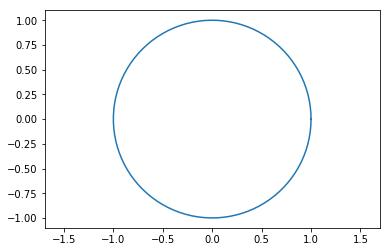

In [116]:
x = np.zeros((2,100))
x[0,:] = np.cos(np.linspace(0, 2, num=100)*math.pi)
x[1,:] = np.sin(np.linspace(0, 2, num=100)*math.pi)
plt.axis('equal')
plt.plot(x[0,:],x[1,:])

# We now construct a random 2x2 matrix that will act as a linear transformation to the set of all vectors forming the unit ball. The vector will now be stretched to form an elipse

In [126]:
A = np.random.randn(2,2)
A

array([[ 0.56841954,  1.50823665],
       [-1.70325333,  1.94537905]])

# To visualize how the space has been stretched by A

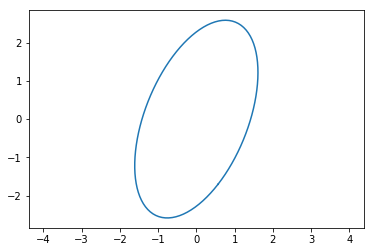

In [127]:
y = A.dot(x)
plt.axis('equal')
plt.plot(y[0,:],y[1,:])

# The transformed elipse will have 2 orthogonal basis which will later be shown to be $\sigma_1*U_1$ and $\sigma_2*U_2$. Now we perform SVD on the transformation matrix A

In [159]:
U,Sigma,V = np.linalg.svd(A)
print("U is \n",U,"\n")
print("Sigma is \n",Sigma,"\n")
print("V is \n",V,"\n")

U is 
 [[ 0.37369035  0.92755352]
 [ 0.92755352 -0.37369035]] 

Sigma is 
 [2.73452009 1.34381919] 

V is 
 [[-0.5000679  0.8659862]
 [ 0.8659862  0.5000679]] 



# We can verify that columns of U or V are orthonormal (perpendicular to each other and norm equals 1)

In [163]:
print("U_1 dot U_2 is", U[:,0].dot(U[:,1]))
print("V_1 dot V_2 is", V[:,0].dot(V[:,1]))
print("norm of U_1 is", np.linalg.norm(U[:,0]))
      

U_1 dot U_2 is 0.0
V_1 dot V_2 is 0.0
norm of U_1 is 1.0


# The meaning of V is that the 2 columns of V form an orthogonal basis for the original unit ball. W will plot V1 and V2 together with the unit ball

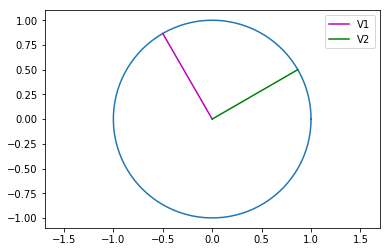

In [153]:
plt.axis('equal')
plt.plot(x[0,:],x[1,:])
plt.plot([0,V[0,0]],[0, V[1,0]], color = 'm', label = 'V1')
plt.plot([0,V[0,1]],[0, V[1,1]], color = 'g', label = 'V2')
plt.legend()

# The meaning of U is that the 2 columns of U form an orthogonal basis for the elipse, one is the major axis, the other is the minor axis. The length of U's vectors will be the corresponding singular values. We will plot U1 and U2 together with the elipse

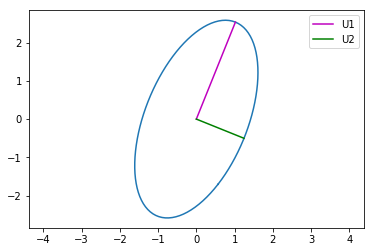

In [158]:
plt.axis('equal')
plt.plot(y[0,:],y[1,:])
plt.plot([0,Sigma[0]*U[0,0]],[0, Sigma[0]*U[1,0]], color = 'm', label = 'U1')
plt.plot([0,Sigma[1]*U[0,1]],[0, Sigma[1]*U[1,1]], color = 'g', label = 'U2')
plt.legend()

# The meaning of Sigma (singular values) is that: 
    if A multiply by the first vector of V, we get another vector of length (norm) = 2.734, and
    if A multiply by the second vector of V, we get another vector of length (norm) = 1.3438

In [164]:
print("Norm of U_1 = A*V[:,0] is ",np.linalg.norm(A.dot(V[:,0])))
print("Norm of U_2 = A*V[:,1] is ",np.linalg.norm(A.dot(V[:,1])))

Norm of U_1 = A*V[:,0] is  2.734520090876865
Norm of U_2 = A*V[:,1] is  1.3438191892553637


# Application of SVD in image compression. 
# Why would we need SVD? One of the most widely used application is in image compression. 
# Theorem states that, if we have an SVD of a matrix A (original image) of rank $r$, and given $\nu < r$, then $A_{\nu} = \sum_{j = 1}^{\nu} \sigma_ju_jv_j^*$ is the BEST $\nu$-rank approximation of A
# In practice, even with $\nu = 0.1 r$, we can get a quite good representation of the original image

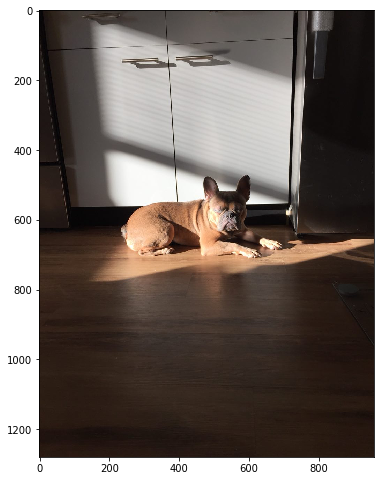

In [2]:
img = Image.open('Duke.jpg')
plt.figure(figsize = (6,9))
plt.imshow(img)

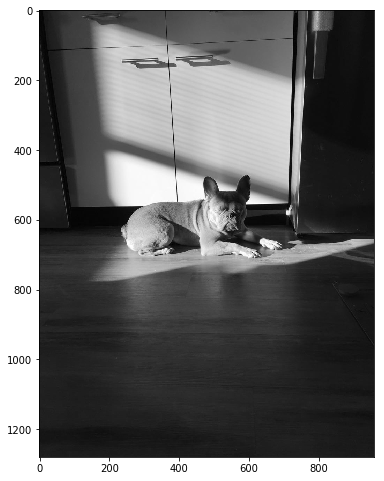

In [3]:
img_gray = img.convert('LA')
plt.figure(figsize = (6,9))
plt.imshow(img_gray)

In [4]:
img_gray.size

(960, 1280)

In [57]:
import imageio
#turn image into numpy 2D array 
img_matrix = imageio.imread('Duke.jpg')

In [50]:
#we see that the image has 3 channel R-G-B
img_matrix.shape

(1280, 960, 3)

In [58]:
#we extract the first channel only 
img_matrix = img_matrix[:,:,0]

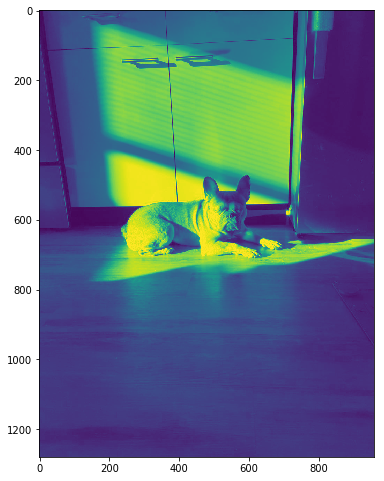

In [83]:
plt.figure(figsize=(6,9))
plt.imshow(img_matrix)

In [26]:
img_matrix = np.matrix(img_matrix.reshape(960,1280))

In [52]:
img_matrix.shape

(1280, 960)

In [53]:
#perform SVD on this single channel image
U,Sigma,V = np.linalg.svd(img_matrix,full_matrices=True)

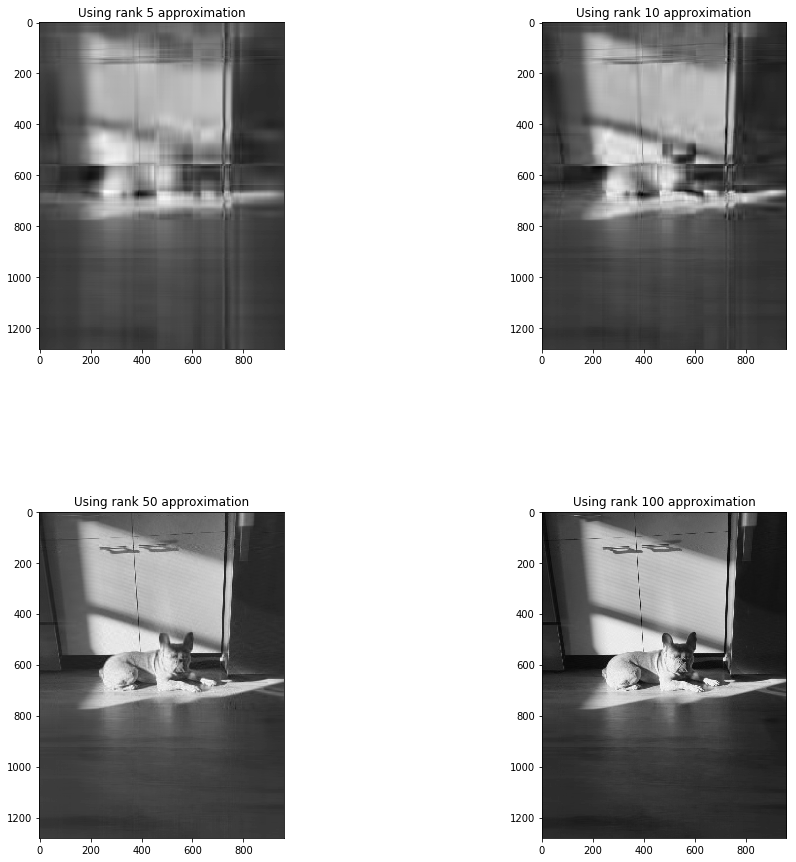

In [78]:
fig = plt.figure(figsize = (15,15))

plt.subplots_adjust(wspace = 0.5,hspace = 0.5)
plt.subplot(2, 2, 1)
img_reconstructed = np.matrix(U[:,:5])*np.diag(Sigma[:5])*np.matrix(V[:5,:])
plt.title('Using rank 5 approximation')
plt.imshow(img_reconstructed,cmap='gray')

plt.subplot(2, 2, 2)
img_reconstructed = np.matrix(U[:,:10])*np.diag(Sigma[:10])*np.matrix(V[:10,:])
plt.title('Using rank 10 approximation')
plt.imshow(img_reconstructed,cmap='gray')

plt.subplot(2, 2, 3)
img_reconstructed = np.matrix(U[:,:50])*np.diag(Sigma[:50])*np.matrix(V[:50,:])
plt.title('Using rank 50 approximation')
plt.imshow(img_reconstructed,cmap='gray')

plt.subplot(2, 2, 4)
img_reconstructed = np.matrix(U[:,:100])*np.diag(Sigma[:100])*np.matrix(V[:100,:])
plt.title('Using rank 100 approximation')
plt.imshow(img_reconstructed,cmap='gray')


In [62]:
U.shape

(1280, 1280)

In [63]:
V.shape

(960, 960)

In [64]:
Sigma.shape

(960,)

In [65]:
img_reconstructed.shape


(1280, 960)

In [66]:
img_matrix

Image([[14, 14, 11, ..., 18, 18, 18],
       [14, 13, 10, ..., 18, 18, 18],
       [12, 12, 10, ..., 18, 18, 18],
       ...,
       [44, 44, 44, ..., 39, 39, 39],
       [44, 44, 44, ..., 40, 40, 40],
       [44, 44, 44, ..., 40, 40, 40]], dtype=uint8)

In [ ]:
# Reconstruct color image

In [84]:
img_matrix = imageio.imread('Duke.jpg')

In [143]:
def reconstruct_matrix(A,rank):
    U,Sigma,V = np.linalg.svd(A)
    return (np.matrix(U[:,:rank])*np.diag(Sigma[:rank])*np.matrix(V[:rank,:]))
def reconstruct_RGB(img_matrix,rank):
    new_img = np.zeros(img_matrix.shape)
    new_img[:,:,0] = reconstruct(img_matrix[:,:,0],rank)
    new_img[:,:,1] = reconstruct(img_matrix[:,:,1],rank)
    new_img[:,:,2] = reconstruct(img_matrix[:,:,2],rank)
    new_img = new_img.astype(np.uint8)
    return new_img
    

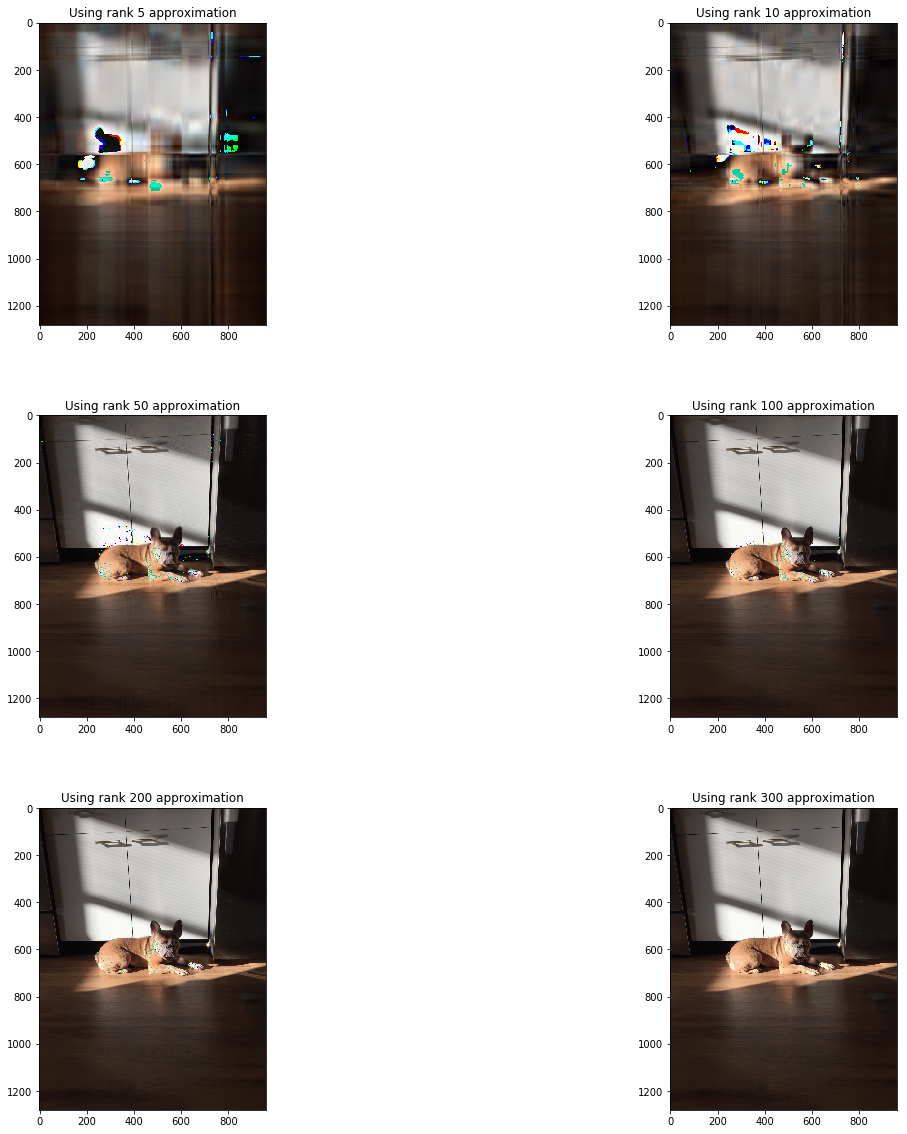

In [146]:
fig = plt.figure(figsize = (20,20))

plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
plt.subplot(3, 2, 1)
plt.title('Using rank 5 approximation')
plt.imshow(reconstruct_RGB(img_matrix,5))

plt.subplot(3, 2, 2)
plt.title('Using rank 10 approximation')
plt.imshow(reconstruct_RGB(img_matrix,10))

plt.subplot(3, 2, 3)
plt.title('Using rank 50 approximation')
plt.imshow(reconstruct_RGB(img_matrix,50))

plt.subplot(3, 2, 4)
plt.title('Using rank 100 approximation')
plt.imshow(reconstruct_RGB(img_matrix,100))

plt.subplot(3, 2, 5)
plt.title('Using rank 200 approximation')
plt.imshow(reconstruct_RGB(img_matrix,200))

plt.subplot(3, 2, 6)
plt.title('Using rank 300 approximation')
plt.imshow(reconstruct_RGB(img_matrix,300))